In [40]:
import pandas as pd
import csv
import json
import numpy as np
from census import Census
import requests
from us import states
from api_key import weather_key
import matplotlib.pyplot as plt
import scipy.stats as sts

In [33]:
#call in the 2019 US accident csv
file_path = 'final_accident.csv'

final_accident_df = pd.read_csv(file_path)

In [4]:
#run stats for 2019 US accident totals
final_accident_df.describe()

,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,953733.000000,953733.000000,936596.000000,804535.000000,935298.000000,893690.000000,734636.000000
mean,36.692206,-96.665776,60.744718,60.161543,9.070157,7.426030,0.006961
std,4.840517,17.375819,19.486831,22.647872,2.867206,5.307131,0.060485
min,24.555269,-124.534439,-33.000000,-59.000000,0.000000,0.000000,0.000000
25%,33.743729,-117.616121,48.000000,45.000000,10.000000,3.500000,0.000000
50%,35.971110,-93.121780,63.000000,64.000000,10.000000,7.000000,0.000000
75%,40.538670,-81.236946,75.000000,77.000000,10.000000,10.000000,0.000000
max,49.002201,-67.703370,170.600000,115.000000,130.000000,255.000000,25.000000


In [8]:
# rain = final_accident_df[final_accident_df['Precipitation(in)'] > 1]
# accidents_vs_precipitation = rain.groupby("Precipitation(in)").count()['City'] 
# accidents_vs_precipitation = accidents_vs_precipitation.reset_index()
# accidents_vs_precipitation

In [9]:
#created scatterplot of precipitation by accidents, not a good depiction of data
# fig, ax = plt.subplots()
# ax.scatter(accidents_vs_precipitation['Precipitation(in)'], accidents_vs_precipitation['City'] , color='r')
# ax.set_xlabel('Precipitation (in)')
# ax.set_ylabel('Accidents')
# ax.set_title('scatter plot')
# fig.set_size_inches(15, 10.5)
# plt.show()

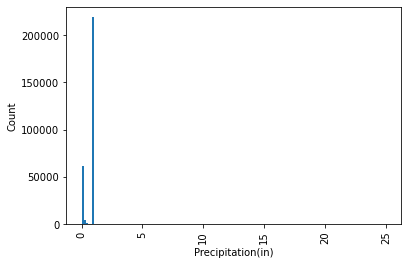

Mean: 0.7803091502631067
Median: 1.0
Mode: 0    1.0
dtype: float64


In [55]:
#turn precip column into series for hist
precipitation = final_accident_df[final_accident_df["Precipitation(in)"] > 0]

#reset variable for hist. based on new df
precip_hist = precipitation['Precipitation(in)']

#determine hist of precip
plt.hist(precip_hist, bins= 150)
plt.xlabel('Precipitation(in)')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.savefig("../../../.png")
plt.show()

#determine measures of data
mean = precipitation['Precipitation(in)'].mean()
median = precipitation['Precipitation(in)'].median()
mode = precipitation['Precipitation(in)'].mode()
print(f'Mean: {mean}')
print(f'Median: {median}')
print(f'Mode: {mode}')

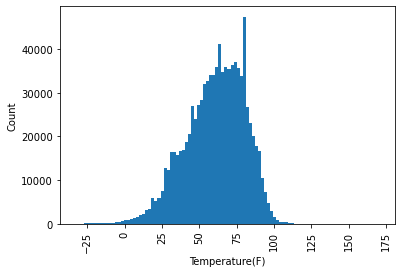

Mean: 60.74471789330726
Median: 63.0
Mode: 0    73.0
dtype: float64


In [52]:
#turn precip column into series for hist
temp = final_accident_df[final_accident_df["Temperature(F)"] > -89]

#reset variable for hist. based on new df
temp_hist = temp['Temperature(F)']

#determine hist of precip
plt.hist(temp_hist, bins=100)
plt.xlabel('Temperature(F)')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

#determine measures of data
mean = temp['Temperature(F)'].mean()
median = temp['Temperature(F)'].median()
mode = temp['Temperature(F)'].mode()
print(f'Mean: {mean}')
print(f'Median: {median}')
print(f'Mode: {mode}')

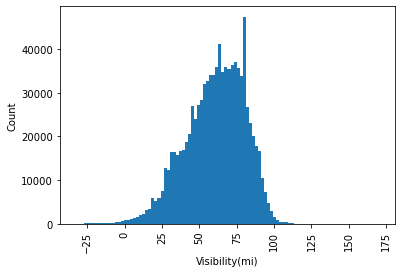

Mean: 9.070156549035708
Median: 10.0
Mode: 0    10.0
dtype: float64


In [53]:
#turn precip column into series for hist
vis = final_accident_df[final_accident_df["Visibility(mi)"] > -89]

#reset variable for hist. based on new df
vis_hist = vis['Visibility(mi)']

#determine hist of precip
plt.hist(temp_hist, bins=100)
plt.xlabel('Visibility(mi)')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

#determine measures of data
mean = vis['Visibility(mi)'].mean()
median = vis['Visibility(mi)'].median()
mode = vis['Visibility(mi)'].mode()
print(f'Mean: {mean}')
print(f'Median: {median}')
print(f'Mode: {mode}')

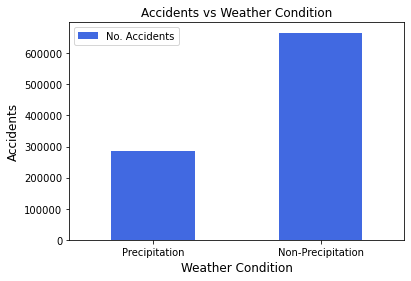

In [43]:
#2019 total US accidents wet/dry bar graph
final_accident_df['Precipitation(in)'] = final_accident_df['Precipitation(in)'].fillna(0)
precip = final_accident_df['Precipitation(in)'] > 0
precip_wet = final_accident_df[precip]['Date'].count()
no_precip = final_accident_df['Precipitation(in)'] == 0
precip_dry = final_accident_df[no_precip]['Date'].count()
df = pd.DataFrame({'Weather Condition':['Precipitation', 'Non-Precipitation'],'No. Accidents':[precip_wet,precip_dry]})
ax = df.plot.bar(x='Weather Condition', y='No. Accidents', rot=0, title = 'Accidents vs Weather Condition', color = 'royalblue')
ax.set_ylabel('Accidents', size=12)
ax.set_xlabel('Weather Condition', size=12)
plt.show()

<ipython-input-25-7b04e9a6d69d>:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(totals, labels = labels,


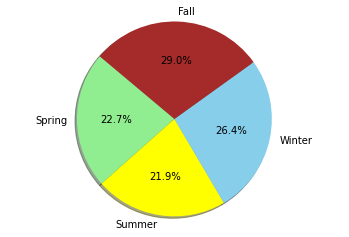

<Figure size 720x720 with 0 Axes>

In [25]:
#create pie chart of each season's total accident percents
labels = ['Spring', 'Summer', 'Winter', 'Fall']
accident_counts = [216266, 208981, 252116, 276370] 

label = [labels]
totals = [accident_counts]
colors = ["lightgreen", "yellow", "skyblue", "brown"]

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(totals, labels = labels, 
        colors = colors, autopct="%1.1f%%", shadow=True, startangle = 140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
#print the final product to the screen
fig = plt.figure(figsize=(10,10))
plt.show()

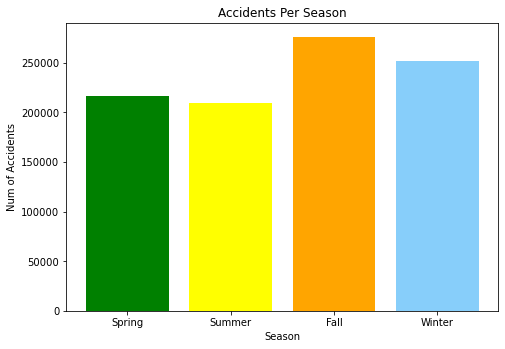

In [56]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
label = ['Spring', 'Summer', 'Fall', 'Winter']
totals = [216266, 208981, 276370, 252116]
colors = ['green', 'yellow', 'orange', 'lightskyblue']
plt.title('Accidents Per Season')
plt.xlabel('Season')
plt.ylabel('Num of Accidents')
ax.bar(label,totals, color = colors)
plt.show()